In [1]:
# T2D Animations C

In [2]:
# import libraries 

import sys
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors 
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap,BoundaryNorm 
import matplotlib.animation as animation
import copy


In [3]:
# Set up the system

nC  = 16     # number of cells/dimension
nC2 = nC**2        # number of cells

nV  = 16   # number of cars
assert (nV <= nC2)

Den = nV/(nC2)

pVu = 0.5
assert ((0. < pVu ) and (pVu <= 1.))
pVr = 1- pVu

nVu = int(pVu * nV)
nVr = nV - pVu

nF = 128              # number of frames
updateInterval  = 200 # update interval

In [4]:
# put the cars on the grid

def setUpGrid(nC,nV,nVu):
    
    nC2 = nC**2
    Grid = np.zeros(nC2)

    # set up a list of empty cells

    Empty = []
    Full = []
    nEmpty = nC2

    for n in range(nC2):
        Empty.append(n)

    for n in range(nV):
        j = random.randrange(nEmpty)
        Full.append(Empty.pop(j))
        nEmpty -= 1

    for n in range(nVu):
        Grid[Full[n]] = -1
    for n in range(nVu,nV):
        Grid[Full[n]] = 1
    
    Grid = Grid.reshape((nC,nC))
    return (Grid)

In [5]:
# def Move(oldGrid,nC,t):
    
#     newGrid = oldGrid.copy()
#     mU = 0
#     mR = 0
#     for j in range(nC):
#         for i in range(nC):
#             newGrid[i,j] = oldGrid[(i-1)%nC,(j-1)%nC]
                
#     return (newGrid,mU,mR)

In [6]:
def Move(oldGrid,nC,t):
    
    newGrid = oldGrid.copy()
    mU = 0
    mR = 0
    for j in range(nC):
        for i in range(nC):
            if ((oldGrid[i,j] == 1) and ((t%2) == 0) and (oldGrid[(i-1)%nC,j] == 0)):
                    newGrid[i,j] = 0                     # move up
                    newGrid[(i-1)%nC,j] = 1
                    mU += 1
            elif ((oldGrid[i,j] == -1) and ((t%2) == 1) and (oldGrid[i,(j+1)%nC] == 0)):
                    newGrid[i,j] = 0                     # move right
                    newGrid[i,(j+1)%nC] = -1
                    mR += 1
                
    return (newGrid,mU,mR)

In [7]:
# check setup

Grid = setUpGrid(nC,nV,nVu)
print (Grid)

Se = 0
Su = 0
Sr = 0

for i in range(nC):
    for j in range(nC):
        if (Grid[i,j] == 0):  Se += 1
        if (Grid[i,j] == -1): Su += 1
        if (Grid[i,j] == 1):  Sr += 1
            
assert (Su == nVu)
assert (Su == Sr)
assert (Su+Sr == nV)
assert (Su+Sr+Se == nC**2)

print (Se,Su,Sr,Su+Sr,Se+Su+Sr)
            

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.  0. -1.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 

In [8]:
# for t in range(5):
#     oldGrid = Grid.copy()
#     Grid,mU,mR = Move(Grid,nC,t)
#     print (t,mU,mR)
#     print (Grid)

In [9]:
light_gray = np.array([220/256 ,220/256, 220/256, 1])
green = np.array([50/256, 200/256, 50/256, 1])
red = np.array([255/256, 90/256, 90/256, 1])

newColors = np.zeros((3,4))
newColors[0,:] = red
newColors[1,:] = light_gray
newColors[2,:] = green

Cmap = ListedColormap(newColors)


In [10]:
N = 3
boundary_norm = BoundaryNorm([-1.5, -0.5, 0.5, 1.5],Cmap.N)

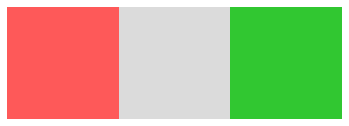

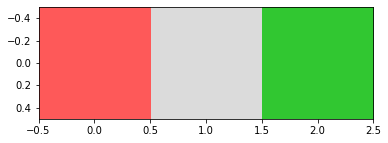

In [11]:
tst=np.zeros((1,3))
for i in range(3):
    tst[0,i] = i-1  
fig, ax = plt.subplots()
ax.axis('off')
img = ax.imshow(tst, cmap=Cmap) 
plt.show()

plt.imshow(tst, cmap=Cmap, norm=boundary_norm)

In [12]:
def Update(frameNum, img, oldGrid, nC):
      
    newGrid,Mu,Mr = Move(oldGrid,nC,frameNum)       
    displayGrid = copy.deepcopy(newGrid)
    img.set_data(displayGrid)
    oldGrid[:,:] = newGrid[:,:]
    return img,              

C:\Users\Erik\Documents\T2D C c=16^2,v=16 .mp4


<function matplotlib.pyplot.show(close=None, block=None)>

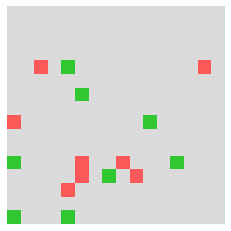

In [13]:
# set up and run animation

oldGrid = Grid
fig, ax = plt.subplots()
ax.axis('off')

img = ax.imshow(oldGrid, cmap=Cmap, interpolation='nearest',norm=boundary_norm)
ani = animation.FuncAnimation(fig, Update, fargs=(img, oldGrid, nC),
                            frames = nF,
                            interval=updateInterval,
                            repeat=False)

f = r'C:\Users\Erik\Documents\T2D C c='+str(nC)+'^2,v='+str(nV)+' .mp4' 
print (f)

ani.save(f, writer='ffmpeg',fps=1)

plt.show